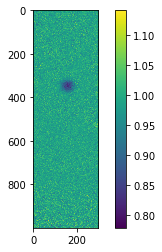

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from UQG6 import load_image, column_density, gauss, parabola, twoD_Gaussian

# Define parameters

myfilename='A_Thermal_5.bin'
resolution_x=300   # number of pixels in x direction
resolution_y=1000  # number of pixels in y direction
pixel_size = 3.68*10**(-6) #m

u = 1.6E-27 #Kg
m = 78*u #atomic mass Rb87
sigma = 2.9E-13 #absorption cross section m^2

# Now load the data from one image
data = load_image(myfilename,resolution_x,resolution_y)

# output the picture on the screen
plt.imshow(data)
plt.savefig('Absorption_Image5.png')
plt.colorbar()
plt.show()


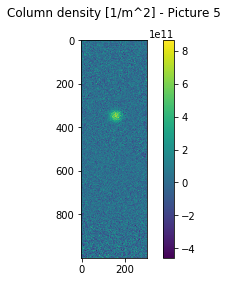

In [2]:
######################################  (a) #######################################
#COLUMN DENSITY

n = column_density(data,sigma)  #[1/m^2]
plt.imshow(n)
plt.colorbar()
plt.title('Column density [1/m^2] - Picture 5',y=1.08)
plt.savefig('ColumnDensity_Image5.png')
plt.show()


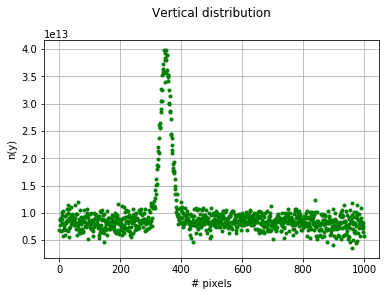

In [3]:
######################################  (b) #######################################
#ATOM NUMBER n(y)
n_y = np.zeros(resolution_y)   #[number of atoms per m
for i in np.arange(0,resolution_y):
    n_y[i] = np.sum(n[i,:])

fig=plt.figure(figsize=(6,4));ax=fig.add_subplot(111)
plt.plot(n_y,linestyle="",marker=".",color='g')
plt.grid()
plt.title('Vertical distribution',y=1.08)
plt.xlabel('# pixels'); plt.ylabel('n(y)')
plt.savefig('VerticalDistrib_Image5.png')
plt.show()

[8.35667359e+12 2.98990294e+13 3.47657500e+02 1.76432631e+01]


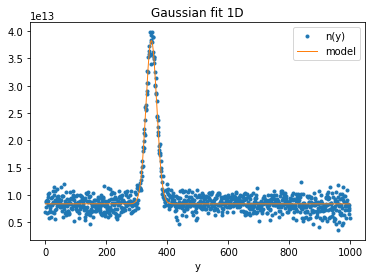

In [4]:
######################################  (c) #######################################
x_data = np.arange(0,resolution_y)
y_data = n_y
df = pd.DataFrame({'y':x_data,'n(y)':y_data})

#An estimate for our parameters
p0_guess = [10**3,4*10**13,300,100] #[offset, n0, y0, sigma_y]

#do the fit
#with curve_fit using our f_model() function and the initial guess for the parameters
parameters, covariance = curve_fit(
    gauss,
    xdata=df["y"],
    ydata=df["n(y)"],
    p0 = p0_guess
)
print(parameters)
offset_opt, n0_opt, y0_opt, sigma_y = parameters

df["model"] = gauss(df.y, offset_opt, n0_opt, y0_opt, sigma_y)
df.head()

ax = df.plot(
    x="y", y="n(y)",
    kind="line", title="Gaussian fit 1D",
    linestyle="", marker=".", linewidth=1
)
ax = df.plot(
    x="y", y="model",
    kind="line", ax=ax, linewidth=1
)
plt.savefig('GaussianFit1D_Image5.png')

Parameters A_Thermal_1.bin : 
[offset (1/m), n0 (1/m), y0,sigma_y]= [ 8.8E+12 , 6.6E+13 , 2.15E+02 , -6.5E+00 ]
[err. offset (1/m), err. n0 (1/m), err. y0, err. sigma_y]= [ 4.6E+10 , 5.1E+11 , 5.79E-02 , 5.8E-02 ]

Parameters A_Thermal_2.bin : 
[offset (1/m), n0 (1/m), y0,sigma_y]= [ 7.4E+12 , 5.8E+13 , 2.33E+02 , 8.9E+00 ]
[err. offset (1/m), err. n0 (1/m), err. y0, err. sigma_y]= [ 4.6E+10 , 4.4E+11 , 7.61E-02 , 7.7E-02 ]

Parameters A_Thermal_3.bin : 
[offset (1/m), n0 (1/m), y0,sigma_y]= [ 8.4E+12 , 4.3E+13 , 2.61E+02 , -1.2E+01 ]
[err. offset (1/m), err. n0 (1/m), err. y0, err. sigma_y]= [ 4.3E+10 , 3.6E+11 , 1.13E-01 , 1.1E-01 ]

Parameters A_Thermal_4.bin : 
[offset (1/m), n0 (1/m), y0,sigma_y]= [ 1.0E+13 , 3.6E+13 , 2.99E+02 , 1.4E+01 ]
[err. offset (1/m), err. n0 (1/m), err. y0, err. sigma_y]= [ 4.5E+10 , 3.4E+11 , 1.56E-01 , 1.6E-01 ]

Parameters A_Thermal_5.bin : 
[offset (1/m), n0 (1/m), y0,sigma_y]= [ 8.4E+12 , 3.0E+13 , 3.48E+02 , -1.8E+01 ]
[err. offset (1/m), err. n0 (1

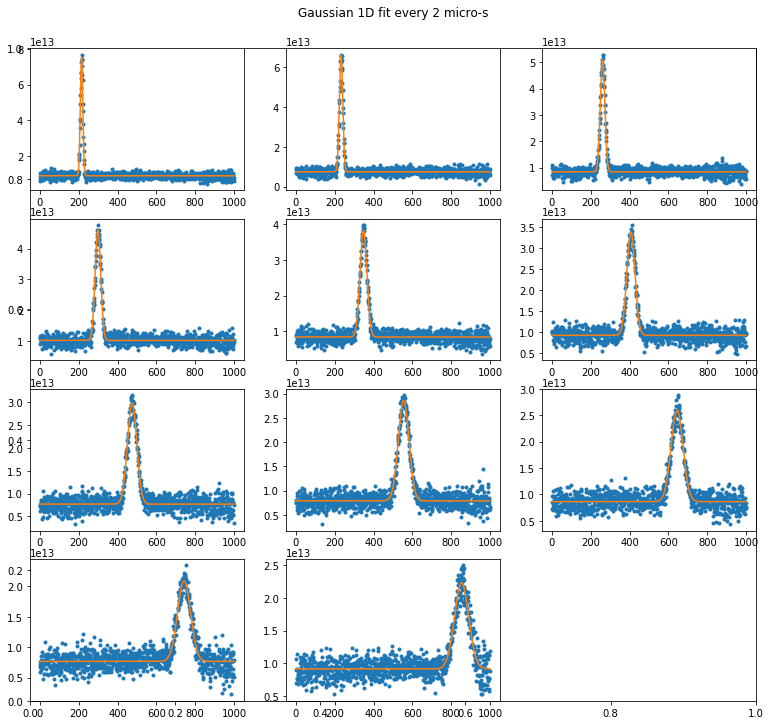

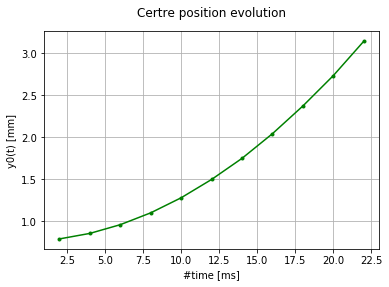

In [5]:
######################################  (d) #######################################
#Write a loop which applies the fit to all fgures and prints the fit results. 
#Plot x0(t),the centre position of the Gaussian, as a function of expansion time t.

y = np.arange(0,resolution_y)

y0 = np.zeros(11) #centre positions initialization
e_y0_1D = np.zeros(11)

fig = plt.figure(figsize=(13,12))
plt.title('Gaussian 1D fit every 2 micro-s',y = 1.04)

for i in range(1, 12):
    myfilename = "A_Thermal_%d.bin" % (i)
    data = load_image(myfilename,resolution_x,resolution_y)
    n = column_density(data,sigma)
    n_y = np.zeros(resolution_y)
    for j in np.arange(0,resolution_y):
        n_y[j] = np.sum(n[j,:])

    shift_y0 = 50*i #I neet to shift the initialization for the centre position of the gaussian 
    p0_guess = [10**3,4*10**13,260+shift_y0,100]  #[offset, n0, y0, sigma_y]
    param_gauss, cov_gauss = curve_fit(gauss, y, n_y, p0 = p0_guess)
    offset_opt, n0_opt, y0_opt, sigma_y = param_gauss
    y0[i-1] = y0_opt
    y_gauss_fit = gauss(y, offset_opt, n0_opt, y0_opt, sigma_y)
    
    #errors
    par_err = np.sqrt(np.diag(cov_gauss))
    e_off, e_n0, e_y0, e_sigma = par_err
    e_y0_1D[i-1] = e_y0
    
    print("Parameters", myfilename, ": ")
    print("[offset (1/m), n0 (1/m), y0,sigma_y]=",
          "[",f"{param_gauss[0]:.1E}",",",f"{param_gauss[1]:.1E}",",",
          f"{param_gauss[2]:.2E}",",",f"{param_gauss[3]:.1E}","]")
    print("[err. offset (1/m), err. n0 (1/m), err. y0, err. sigma_y]=",
          "[",f"{par_err[0]:.1E}",",",f"{par_err[1]:.1E}",",",
          f"{par_err[2]:.2E}",",",f"{par_err[3]:.1E}","]")
    print()
    
    fig.add_subplot(4,3,i)
    ax = plt.plot(y, n_y, '.', label = "data")
    ax = plt.plot(y, y_gauss_fit, '-', label = "fit")    

plt.savefig('GaussianFit1D_all.png')

time = np.zeros(11)
for i in range(11): #every image i taken after 2 micro s
    time[i] = 2 + 2*i
fig1=plt.figure(figsize=(6,4));ax=fig1.add_subplot(111)
plt.plot(time,y0*pixel_size*10**3,linestyle="-",marker=".",color='g')
plt.grid()
plt.title('Certre position evolution', y=1.04)
plt.xlabel('#time [ms]'); plt.ylabel('y0(t) [mm]')
plt.savefig('CentrePosition_evolution.png')
plt.show()

a= 9.37E+00 m/s^2 ± 3E-02 m/s^2
b= 5.0E-03 m/s ± 3E-04 m/s
c= 7.61E-04 m ± 2E-06 m


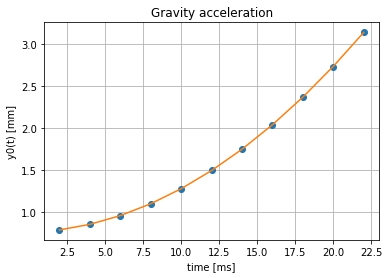

In [8]:
######################################  (e) #######################################
#GRAVITATIONAL CONSTANT g

#I can fit the y0(t) = ((1/2)a*t^2 + b*t + c) --> a=g

y0_par = y0*pixel_size # array with all y0 values (every 2 ms)
time = time*10**(-3)

param_par, covar_par = curve_fit(parabola, time, y0_par, p0 = (9,0,y0_par[0]))
a,b,c = param_par
#error
err = np.sqrt(np.diag(covar_par))
e_a, e_b, e_c = err

print("a=",f"{a:.2E}","m/s^2 ±",f"{e_a:.0E}","m/s^2")
print("b=",f"{b:.1E}","m/s ±",f"{e_b:.0E}","m/s")
print("c=",f"{c:.2E}","m ±", f"{e_c:.0E}","m")
fit_y = parabola(time, a, b, c)

time = time/10**(-3) #ms
y0_par = y0_par/10**(-3) #mm
fit_y = fit_y/10**(-3) #mm
fig=plt.figure(figsize=(6,4));ax=fig.add_subplot(111)
plt.plot(time, y0_par, 'o', label="data")
plt.plot(time, fit_y, '-', label = "fit")    
plt.grid()
plt.title('Gravity acceleration')
plt.xlabel('time [ms]'); plt.ylabel('y0(t) [mm]')
plt.savefig('Gravity acceleration.png')
plt.show()


opt_param= [2.78067859e+10 6.49753094e+11 1.57407771e+02 3.47451413e+02
 1.85508625e+01 1.76528512e+01]


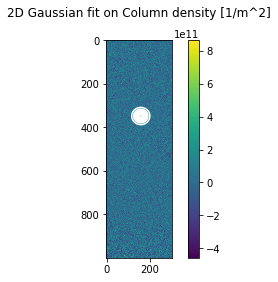

In [9]:
############################ EXERCISE 2 ################################################

############################### (a) ####################################################

x = np.arange(0,resolution_x)
y = np.arange(0,resolution_y)
x,y = np.meshgrid(x, y)
X = (x,y)

#as an example I apply the gauss2D fit to the 5th figure
myfilename = "A_Thermal_5.bin"
data = load_image(myfilename,resolution_x,resolution_y)  #load the figure
n = column_density(data,sigma)  #calculate the column density for this figure
n_data =n.ravel()   #I need to organize my data in a column array, in order to apply the fit

param_guess = (10**12,4*10**13, 150, 350, 20, 20)

param, covar = curve_fit(twoD_Gaussian, X, n_data, p0 = param_guess)

print("opt_param=",param)
offset_opt, n0_opt, x0_opt, y0_opt, sigma_x, sigma_y= param

#fit of the figure with the optimized parameters
data_fitted = twoD_Gaussian(X, offset_opt, n0_opt, x0_opt, y0_opt, sigma_x, sigma_y)

# plot twoD_Gaussian data generated above
plt.figure()
plt.imshow(n_data.reshape(1000,300))
plt.colorbar()
plt.contour(x,y, data_fitted.reshape(1000,300), 8, colors='w')
plt.title('2D Gaussian fit on Column density [1/m^2]',y=1.08)
plt.savefig('2Dgauss_picture5.png')

In [12]:
############################### (b) ####################################################
#1) write a loop which applies the fit to all figures and PRINT the fit results

#fig = plt.figure(figsize=(12,10))
#plt.title('Gaussian 2D fit every 2 micro-s')

y0_2D = np.zeros(11)#centre positions initialization
e_y0_2D = np.zeros(11)

sigma_x_t = np.zeros(11)
sigma_y_t = np.zeros(11)
ell = np.zeros(11) #ellipticity initialization

for i in range(1, 12):
    myfilename = "A_Thermal_%d.bin" % (i)
    data = load_image(myfilename,resolution_x,resolution_y)
    n = column_density(data,sigma)
    n_data =n.ravel()  
    
    #shift_y0 = 40*(i-1) #I neet to shift the initialization for the centre position of the gaussian
    param_guess = (10**12,4*10**13, 150, y0[i-1], 20, 20)
    
    param, covar = curve_fit(twoD_Gaussian, X, n_data, p0 = param_guess)
    offset_opt, n0_opt, x0_opt, y0_opt, sigma_x, sigma_y= param
    #errors
    par_err = np.sqrt(np.diag(covar))
    
    print("Parameters", myfilename, ": ")
    print("[offset (1/m^2), n0 (1/m^2), x0, y0, sigma_x, sigma_y]=",
          "[",f"{param[0]:.1E}",",",f"{param[1]:.1E}",",",
          f"{param[2]:.2E}",",",f"{param[3]:.2E}",",",
          f"{param[4]:.1E}",",",f"{param[5]:.1E}","]")
    print("[err. offset (1/m), err. n0 (1/m), err. x0, err. y0, err. Sigma_x, err. sigma_y]=",
          "[",f"{par_err[0]:.1E}",",",f"{par_err[1]:.1E}",",",
          f"{par_err[2]:.2E}",",",f"{par_err[3]:.2E}",",",f"{par_err[4]:.1E}",
          ",",f"{par_err[5]:.1E}","]")
    print()

    y0_2D[i-1] = y0_opt
    e_y0_2D[i-1] = par_err[2]
    
    sigma_x_t[i-1] = sigma_x*pixel_size #m
    sigma_y_t[i-1] = sigma_y*pixel_size #m
    ell[i-1] = sigma_x/sigma_y
    #fit of the figure with the optimized parameters
    data_fitted = twoD_Gaussian(X, offset_opt, n0_opt, x0_opt, y0_opt, sigma_x, sigma_y)

    #fig.add_subplot(4,3,i)
    #ax = plt.imshow(n_data.reshape(1000,300))
    #ax = plt.contour(x,y, data_fitted.reshape(1000,300), 8, colors='w')  

#2) verify that the y0 is close to that found in 1D fit 
for i in range(1, 12):
    print()
    print("TOF", i*2,"ms:")
    print("y0_1D = ",f"{y0[i-1]:.4E}","+/-",f"{e_y0_1D[i-1]:.0E}")
    print("y0_2D = ",f"{y0_2D[i-1]:0.4E}","+/-", f"{e_y0_2D[i-1]:.0E}")



Parameters A_Thermal_1.bin : 
[offset (1/m^2), n0 (1/m^2), x0, y0, sigma_x, sigma_y]= [ 2.9E+10 , 2.9E+12 , 1.58E+02 , 2.15E+02 , 9.3E+00 , 6.7E+00 ]
[err. offset (1/m), err. n0 (1/m), err. x0, err. y0, err. Sigma_x, err. sigma_y]= [ 1.4E+08 , 7.8E+09 , 2.53E-02 , 1.82E-02 , 2.5E-02 , 1.8E-02 ]

Parameters A_Thermal_2.bin : 
[offset (1/m^2), n0 (1/m^2), x0, y0, sigma_x, sigma_y]= [ 2.5E+10 , 2.1E+12 , 1.58E+02 , 2.33E+02 , 1.1E+01 , 9.0E+00 ]
[err. offset (1/m), err. n0 (1/m), err. x0, err. y0, err. Sigma_x, err. sigma_y]= [ 1.4E+08 , 6.2E+09 , 3.22E-02 , 2.64E-02 , 3.2E-02 , 2.6E-02 ]

Parameters A_Thermal_3.bin : 
[offset (1/m^2), n0 (1/m^2), x0, y0, sigma_x, sigma_y]= [ 2.8E+10 , 1.3E+12 , 1.57E+02 , 2.61E+02 , 1.3E+01 , 1.2E+01 ]
[err. offset (1/m), err. n0 (1/m), err. x0, err. y0, err. Sigma_x, err. sigma_y]= [ 1.4E+08 , 5.0E+09 , 5.20E-02 , 4.53E-02 , 5.2E-02 , 4.5E-02 ]

Parameters A_Thermal_4.bin : 
[offset (1/m^2), n0 (1/m^2), x0, y0, sigma_x, sigma_y]= [ 3.4E+10 , 9.1E+11 , 1

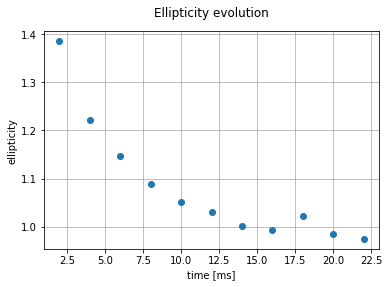

In [160]:
############################### (c) ####################################################
#plot the ellipticity parameters sigma_x/sigma_y as a function of t.

fig=plt.figure(figsize=(6,4));ax=fig.add_subplot(111)
plt.plot(time, ell, 'o')    
plt.grid()
plt.title('Ellipticity evolution',y=1.04)
plt.xlabel('time [ms]'); plt.ylabel('ellipticity')
plt.savefig('Ellipticity evolution')
plt.show()


In [112]:
############################### (d) ####################################################
#temperature of the gas

#I'll measure the temperature for each direction (x,y)
#The idea for the measurement is that knowing the initial and final (after 22 micro s) sigma_i, we can write:
#    (sigma_i(t))^2 = (sigma_i(0))^2 + v_i^2*t^2

#    v_i^2 = (T*kB)/m


#sigma_x_t [m]
#sigma_y_t [m]

#Velocity along x direction:
kB = 1.38 * 10**(-23)  #J/K
t = 20 * 10**(-3) #s  (time of flight)

sigma_x_0 = sigma_x_t[0] #m
sigma_x_22 = sigma_x_t[10] #m

sigma_y_0 = sigma_y_t[0] #m
sigma_y_22 = sigma_y_t[10] #m

T_x = (sigma_x_22**2 - sigma_x_0**2)/(kB*t**2)*m
T_y = (sigma_y_22**2 - sigma_y_0**2)/(kB*t**2)*m

print("T_x =",f"{T_x:.1E}","K")
print("T_y =",f"{T_y:.1E}","K")

T_x = 3.7E-07 K
T_y = 4.0E-07 K


In [212]:
############################### (e) ####################################################
# N atoms

#I choose the 7th figure because of its ellipticity close to 1
myfilename='A_Thermal_7.bin'

# Now load the data from one image
data = load_image(myfilename,resolution_x,resolution_y)
n = column_density(data,sigma)  #[1/m^2]
n_y = np.zeros(resolution_y)   #number of atoms per m
for i in np.arange(0,resolution_y):
    n_y[i] = np.sum(n[i,:])

#parameters of the 2D gaussian fit for the 7th picture
#offset, n0, x0, y0, sigma_x, sigma_y]= [2.56900085e+10 3.63211571e+11 1.55158160e+02 4.75178636e+02
# 2.41344563e+01 2.41016171e+01

sigma_y_7 = 17  #sigma_y for the 7th picture
y0_7 = 475  #centre of the gaussian for the 7th picture

N_y = n_y[int(475-(3*sigma_y_7)):int(475+(3*sigma_y_7))]  #I cut from n_y the values inside the 3*sigma
N_atoms = sum(N_y)*pixel_size  #sum of all n_y * pixel size
print("N atoms extimate= ",f"{N_atoms:.1E}")

N atoms extimate=  7.6E+09
